In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
#from lmfit import minimize, Parameters, Parameter, report_fit

In [3]:
#constant parameters
mi= 0.015
d_mrnamng=0.039
d_mng=0.01
d_mrnaluxr=0.347
d_luxr=0.002
d_AHL=0.01
n=2
b_plux=0.1 #percentage
plux=0.79 #promoters
pcon=58.5*60*10**(-3)
kd2=20*10**(-9)
kdlux=100*10**(-9)
t=np.linspace(0, 1000, 100)
TF_arr=[]






In [4]:
def receivers_model(x,t):
    
    LuxR=x[0]
    mng=x[1]

    dLuxRdt1= (kluxr*pcon*CN/(d_mrnaluxr+mi)) - (d_luxr+mi)*LuxR
    LuxRAHL=LuxR*AHL/(kd2*CN)
    dLuxRdt2= (kluxr*plux*CN/(d_mrnaluxr+mi))*(b_plux+(1-b_plux)*((LuxRAHL**n)/(LuxRAHL**n+kdlux_eff**n))) - (d_luxr+mi)*LuxR
    dLuxRdt=dLuxRdt1+dLuxRdt2+(d_luxr+mi)*LuxR
    dmngdt = (kmng*plux*CN/(d_mrnamng+mi))*(b_plux+(1-b_plux)*((LuxRAHL**n)/(LuxRAHL**n+kdlux_eff**n))) - (d_mng+mi)*mng
    
    return [dLuxRdt,dmngdt]
    

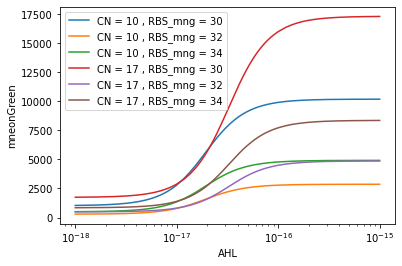

In [5]:
#parametric for rbs_mneon

#variable parameters (constructs)
kluxr=27*60*10**(-3)
kmng_arr= [29*60*10**(-3),8.15*60*10**(-3),14*60*10**(-3)]
CN_arr= [10,17]


AHL_values_0=np.linspace(10**(-18),10**(-17))
AHL_values_1=np.linspace(10**(-17),10**(-16))
AHL_values_2=np.linspace(10**(-16),10**(-15))
AHL_values=np.concatenate([AHL_values_0,AHL_values_1,AHL_values_2])
mng_values=[]
RBS_arr=[30,32,34]
for k in range(2):
    for j in range(3):
        CN=CN_arr[k]
        kmng=kmng_arr[j]
        RBS=RBS_arr[j]
        mng_temp=[]
        kdlux_eff=kdlux*CN
        for i in range(150):
            AHL=AHL_values[i]
            x0=[0,0] #LuxR0-mneo
            solution=odeint(receivers_model,x0,t)
            mng_temp.append(max(solution[:,1]))
        plt.semilogx(AHL_values,mng_temp,label="CN = %1.f , RBS_mng = %2.f"%(CN,RBS))
        plt.xlabel('AHL')
        plt.ylabel('mneonGreen')
        #plt.yscale('log')
        plt.legend()
plt.show()

4915.4723485364675
4913.90569038494
4914.926354315661
8356.03565781775
8348.342481095673
8353.353735520286


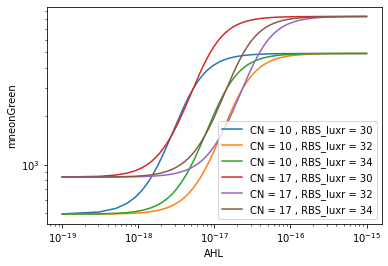

In [6]:
#parametric for rbs_luxr

#variable parameters (constructs)
kluxr_arr=[110*60*10**(-3),24.7*60*10**(-3),40*60*10**(-3)] #rbs for each gene
kmng= 14*60*10**(-3)
CN_arr= [10,17]


AHL_values_0=np.linspace(10**(-19),10**(-17))
AHL_values_1=np.linspace(10**(-17),10**(-16))
AHL_values_2=np.linspace(10**(-16),10**(-15))
AHL_values=np.concatenate([AHL_values_0,AHL_values_1,AHL_values_2])
mng_values=[]
RBS_arr=[30,32,34]
for k in range(2):
    for j in range(3):
        CN=CN_arr[k]
        kluxr=kluxr_arr[j]
        RBS=RBS_arr[j]
        mng_temp=[]
        kdlux_eff=kdlux*CN
        for i in range(150):
            AHL=AHL_values[i]
            x0=[0,0] #LuxR0-mneon0
            solution=odeint(receivers_model,x0,t)
            mng_temp.append(max(solution[:,1]))
        print(max(solution[:,1]))
        plt.semilogx(AHL_values,mng_temp,label="CN = %1.f , RBS_luxr = %2.f"%(CN,RBS))
        plt.xlabel('AHL')
        plt.ylabel('mneonGreen')
        plt.yscale('log')
        plt.legend()
plt.show()

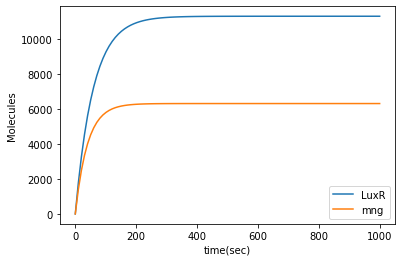

In [7]:
#time-scale

kmng=18*60*10**(-3)
kluxr=27*60*10**(-3)
CN=10


AHL=10**(-8)
x0=[0,0] #LuxR0-mneo
solution=odeint(receivers_model,x0,t)
mng_values.append(max(solution[:,1]))
plt.plot(t, solution[:, 0], label='LuxR');
plt.plot(t, solution[:, 1], label='mng');
plt.legend();
plt.ylabel('Molecules')
plt.xlabel('time(sec)');